# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [3]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [np.dtype('float64')]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
temp = []
for i in range(0 , len(numeric_columns)):
    if len(app_train[numeric_columns[i]].unique()) != 2:
        temp.append(numeric_columns[i])
numeric_columns = temp

# 檢視這些欄位的數值範圍
value_range = [[] , [] , []]
for i in range(0 , len(numeric_columns)):
    value_range[0].append(app_train[numeric_columns[i]].mean())
    value_range[1].append(app_train[numeric_columns[i]].max())
    value_range[2].append(numeric_columns[i])
value_range = pd.DataFrame(value_range).T 
value_range = value_range.set_index(2)
col_names = value_range.columns.values
col_names = ['mean' , 'max']
value_range.columns = col_names 
value_range

,mean,max
2,,
AMT_INCOME_TOTAL,168798,1.17e+08
AMT_CREDIT,599026,4.05e+06
AMT_ANNUITY,27108.6,258026
AMT_GOODS_PRICE,538396,4.05e+06
REGION_POPULATION_RELATIVE,0.0208681,0.072508
DAYS_REGISTRATION,-4986.12,0
OWN_CAR_AGE,12.0611,91
CNT_FAM_MEMBERS,2.15267,20
EXT_SOURCE_1,0.50213,0.962693


In [4]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


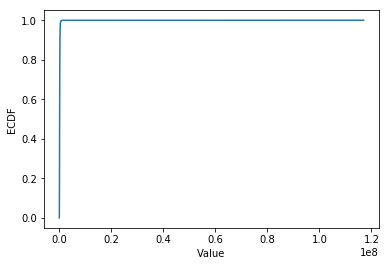

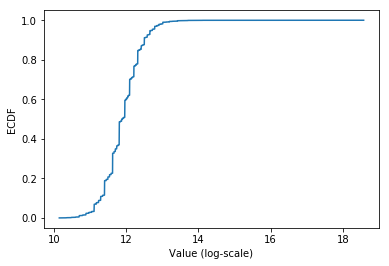

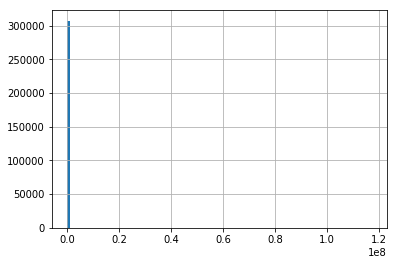

In [5]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
try:
    hist , bin_edges = np.histogram(app_train['AMT_INCOME_TOTAL'] , len(app_train['AMT_INCOME_TOTAL']))
except ValueError:
    app_train['AMT_INCOME_TOTAL'].fillna(app_train['AMT_INCOME_TOTAL'].max() , inplace = True)
    hist , bin_edges = np.histogram(app_train['AMT_INCOME_TOTAL'], len(app_train['AMT_INCOME_TOTAL']))
hist = hist / hist.sum()
cdf = pd.Series(np.cumsum(hist))

plt.plot(bin_edges[:-1] , cdf)
plt.ylim([-0.05 , 1.05]) # 限制顯示圖片的範圍
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

# 改變 x 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(bin_edges[:-1]) , cdf)
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.show()

app_train['AMT_INCOME_TOTAL'].hist(bins = 100)
plt.show()

# 從兩張cdf都可以看出，曲線到最後都延伸的非常長，代表有特別大的值在作怪

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


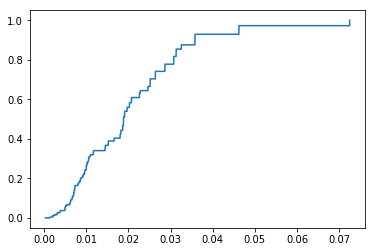

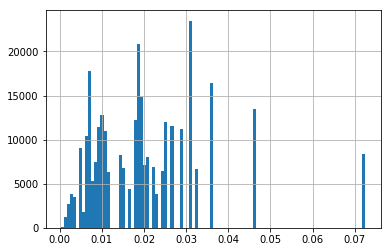

In [6]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
try:
    hist , bin_edges = np.histogram(app_train['REGION_POPULATION_RELATIVE'] , len(app_train['REGION_POPULATION_RELATIVE']))
except ValueError:
    app_train['REGION_POPULATION_RELATIVE'].fillna(app_train['REGION_POPULATION_RELATIVE'].max() , inplace = True)
    hist , bin_edges = np.histogram(app_train['REGION_POPULATION_RELATIVE'], len(app_train['REGION_POPULATION_RELATIVE']))
hist = hist / hist.sum()
cdf = pd.Series(np.cumsum(hist))

plt.plot(bin_edges[:-1] , cdf)
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist(bins = 100)
plt.show()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


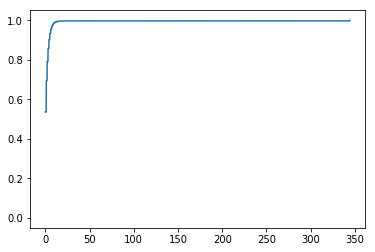

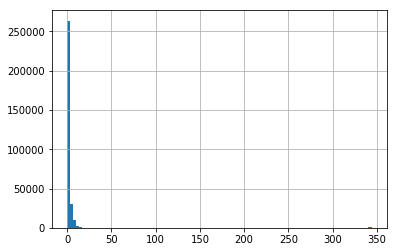

In [7]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
try:
    hist , bin_edges = np.histogram(app_train['OBS_60_CNT_SOCIAL_CIRCLE'] , len(app_train['OBS_60_CNT_SOCIAL_CIRCLE']))
except ValueError:
    app_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].max() , inplace = True)
    hist , bin_edges = np.histogram(app_train['OBS_60_CNT_SOCIAL_CIRCLE'] , len(app_train['OBS_60_CNT_SOCIAL_CIRCLE']))
hist = hist / hist.sum()
cdf = pd.Series(np.cumsum(hist))

plt.plot(bin_edges[:-1] , cdf)
plt.ylim([-0.05,1.05])
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist(bins = 100)
plt.show()

# 從兩張cdf都可以看出，曲線到最後都延伸的非常長，代表有特別大的值在作怪

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。
## 這時可以考慮用 value_counts 去找到這些數值(感覺沒啥用)

C:\Users\peng\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


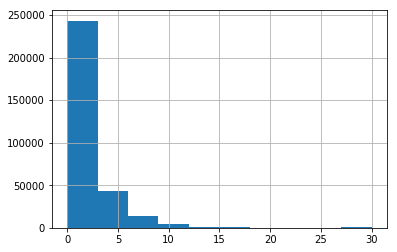

C:\Users\peng\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


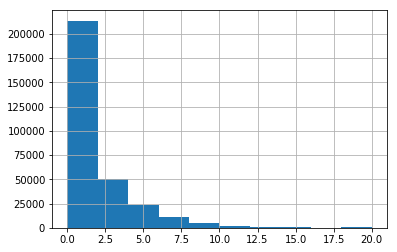

In [8]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 兩個標準差的值以外的值以OBS_60_CNT_SOCIAL_CIRCLE 兩個標準差的值以內的最大值替代
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 大於 20 的值以OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的最大值替代

mean = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].mean()
std = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].std()
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE']
idx = (loc_a - mean) / std > 2
loc_a[idx] = loc_a[~idx].max()
loc_a.hist()
plt.show()

loc_b = app_train['OBS_60_CNT_SOCIAL_CIRCLE']
idx = loc_b > 20
loc_b[idx] = loc_b[~idx].max()
loc_b.hist()
plt.show()